In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
train = pd.read_csv('titanic_train.csv')

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


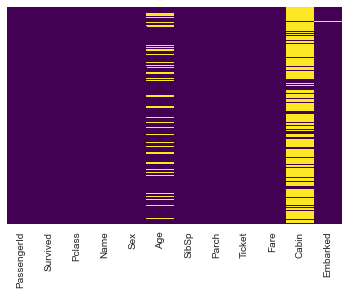

In [51]:
sns.heatmap((train.isnull()),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
sns.set_style('whitegrid')

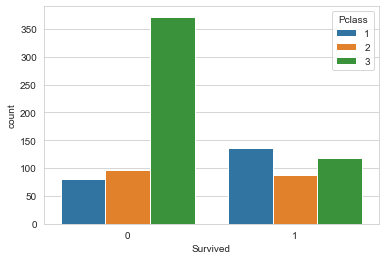

In [53]:
sns.countplot(x='Survived',hue='Pclass',data=train)

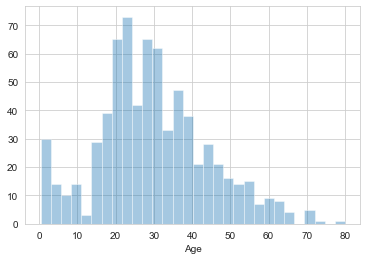

In [54]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


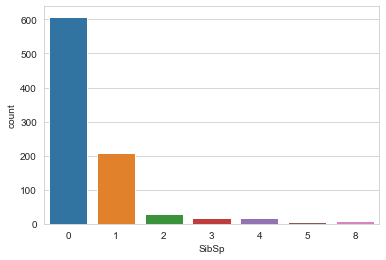

In [56]:
sns.countplot(x='SibSp',data=train)

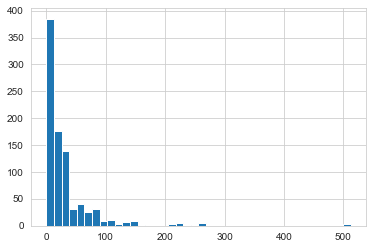

In [57]:
train['Fare'].hist(bins=40)

In [58]:
import cufflinks as cf
cf.go_offline()

In [59]:
#train['Fare'].iplot(kind='hist',bins=40)

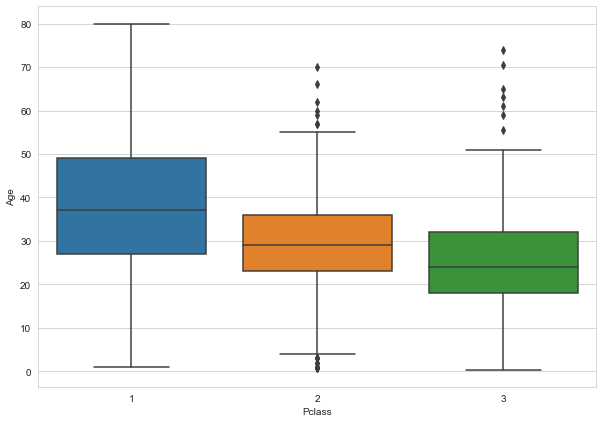

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [61]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [62]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

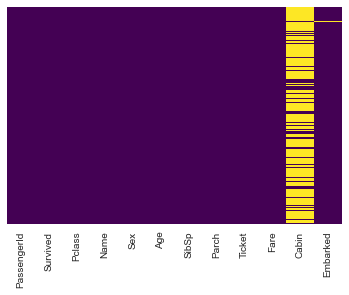

In [63]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
train.drop('Cabin',axis=1,inplace=True)

In [65]:
train.dropna(inplace=True)

In [66]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [67]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [68]:
train = pd.concat([train,sex,embark],axis=1)

In [69]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [71]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [72]:
train.drop('PassengerId',axis=1,inplace=True)

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [78]:
from sklearn.linear_model import LogisticRegression

In [81]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\ranil\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [82]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [85]:
from sklearn.metrics import sonfusion_matrix

ImportError: cannot import name 'sonfusion_matrix' from 'sklearn.metrics' (c:\users\ranil\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\__init__.py)